In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
dataframe=pd.read_csv("stock predict signal (1).csv")

In [4]:
print(dataframe)

           Date  label                                               text
0    2017-01-20    0.0  americans americans every city near far small ...
1    2017-01-23    0.0  busy week planned heavy focus jobs national se...
2    2017-01-24    1.0  signing orders move forward construction keyst...
3    2017-01-25    1.0  interviewed davidmuir tonight clock abc first ...
4    2017-01-26    1.0  miami dade mayor drops sanctuary policy right ...
5    2017-01-27    1.0  promise administration always back always cong...
6    2017-01-30    0.0  american dream back fre going create environme...
7    2017-01-31   -1.0  democrats give us attorney general rest cabine...
8    2017-02-01   -1.0  everybody arguing whether ban call want keepin...
9    2017-02-02   -1.0  thank samsung would love iran last legs ready ...
10   2017-02-03    1.0  must keep evil country new radical islamic ter...
11   2017-02-06    1.0  extended interview super bowl oreillyfactor ai...
12   2017-02-07    1.0  honor national

In [5]:
dataframe=dataframe.drop("Date",axis=1)

In [5]:
""""def labeller (x):
    if x <0:
        return 0
    else:
        return 1"""

'"def labeller (x):\n    if x <0:\n        return 0\n    else:\n        return 1'

In [6]:
#dataframe['label']=dataframe['label'].apply(labeller)

In [62]:
#from collections import Counter
#a=Counter(dataframe['label']==1)


In [6]:
dataframe

,label,text
0,0.0,americans americans every city near far small ...
1,0.0,busy week planned heavy focus jobs national se...
2,1.0,signing orders move forward construction keyst...
3,1.0,interviewed davidmuir tonight clock abc first ...
4,1.0,miami dade mayor drops sanctuary policy right ...
5,1.0,promise administration always back always cong...
6,0.0,american dream back fre going create environme...
7,-1.0,democrats give us attorney general rest cabine...
8,-1.0,everybody arguing whether ban call want keepin...
9,-1.0,thank samsung would love iran last legs ready ...


In [ ]:
#matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
#prices = pd.DataFrame({"price":train_data["SalePrice"], "log(price + 1)":np.log1p(train_data["SalePrice"])})
#prices.hist()
#y_train = np.log1p(y_train)

In [7]:
print(dataframe['text'][1])

busy week planned heavy focus jobs national security top executives coming talk manufacturing america


In [8]:
print(dataframe.groupby(by='label').count())

       text
label      
-1.0     72
 0.0     85
 1.0    154


In [9]:
print(dataframe.shape)

(311, 2)


In [10]:
from sklearn.utils import shuffle
dataframe_s = shuffle(dataframe)

In [11]:
train=dataframe_s.iloc[:270,:]
test=dataframe_s.iloc[270:311,:]

In [13]:
train=train.dropna()
#train=train.drop(columns=['Date'])
test=test.dropna()

from keras.utils.np_utils import to_categorical
y_train=to_categorical(train['label'])
num_class=y_train.shape[1]
print("num_class=",y_train.shape)

In [14]:
train['label'].dtype

dtype('float64')

In [15]:
train['label']=(train['label']+1).astype(int)
test['label']=(test['label']+1).astype(int)

In [16]:
train['label']

247    2
265    1
93     1
301    2
55     0
111    2
2      2
180    2
136    1
222    2
140    1
182    2
220    1
151    2
66     2
232    1
198    2
9      0
256    0
245    2
88     1
203    0
226    2
300    2
223    2
102    2
120    2
4      2
141    1
50     1
      ..
235    0
126    1
118    2
52     1
218    1
11     2
134    2
110    1
205    0
282    0
274    1
309    1
271    1
206    1
270    0
272    1
131    2
31     0
241    2
286    1
156    0
304    0
112    2
165    2
129    2
12     2
97     2
8      0
137    1
115    1
Name: label, Length: 270, dtype: int32

In [17]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)

Using TensorFlow backend.


In [18]:
tokenizer.fit_on_texts(train['text'])
vocab_size=len(tokenizer.word_index)+1

In [19]:
x_train=tokenizer.texts_to_matrix(train['text'])
x_test=tokenizer.texts_to_matrix(test['text'])

In [16]:
#x_train=x_train.reshape(x_train.shape[0],5000,1)
#x_train.shape

(2377, 5000, 1)

In [17]:
#x_test=x_test.reshape(x_test.shape[0],5000,1)
#x_test.shape

(426, 5000, 1)

In [18]:
#print(x_train.shape)

(2377, 5000, 1)


In [21]:
x_train,x_val,y_train,y_val=train_test_split(x_train,train['label'],test_size=0.10,random_state=42)

In [22]:
y_train.dtypes

dtype('int32')

In [23]:
print(x_train.shape)

(243, 5000)


x_train,x_val,y_train,y_val=train_test_split(x_train,train['label'],test_size=0.10,random_state=42)

In [24]:
embeddings_index = dict()
f = open(r'C:\Users\sebas\OneDrive\Documents\Glove\glove.twitter.27B.200d.txt', encoding='utf-8')

In [25]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 200))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Loaded 1193514 word vectors.


In [26]:
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization,Convolution2D, MaxPooling2D
from keras.layers import Dense , Dropout, Lambda, Flatten, Embedding
from keras import Sequential
from keras import regularizers

In [27]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
e = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=5000, trainable=False)
model.add(e)
#model.add(Dense(50,activation='relu'))
#here the standardize is the function we define upwords
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))
#only with softmax, it is a linear model

In [28]:
from keras.optimizers import SGD 
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [29]:
history = model.fit(x_train, # Features
                      y_train, # Target
                      epochs=10, # Number of epochs
                      verbose=1, # No output
                      batch_size=150, # Number of observations per batch
                      validation_data=(x_val, y_val)) # Data for evaluation

Train on 243 samples, validate on 27 samples
Epoch 1/10
243/243 [==============================] - 3s 10ms/step - loss: 1.9366 - acc: 0.3045 - val_loss: 1.7016 - val_acc: 0.5926
Epoch 2/10
243/243 [==============================] - 2s 9ms/step - loss: 1.4394 - acc: 0.8025 - val_loss: 1.7229 - val_acc: 0.6296
Epoch 3/10
243/243 [==============================] - 2s 9ms/step - loss: 1.1611 - acc: 0.9794 - val_loss: 1.7032 - val_acc: 0.5556
Epoch 4/10
243/243 [==============================] - 2s 8ms/step - loss: 0.9695 - acc: 0.9835 - val_loss: 1.6254 - val_acc: 0.5556
Epoch 5/10
243/243 [==============================] - 2s 8ms/step - loss: 0.8562 - acc: 0.9835 - val_loss: 1.5737 - val_acc: 0.5926
Epoch 6/10
243/243 [==============================] - 2s 8ms/step - loss: 0.7854 - acc: 0.9794 - val_loss: 1.5645 - val_acc: 0.5926
Epoch 7/10
243/243 [==============================] - 2s 8ms/step - loss: 0.7358 - acc: 0.9835 - val_loss: 1.5821 - val_acc: 0.5556
Epoch 8/10
243/243 [==========

In [30]:
import matplotlib.pyplot as plt

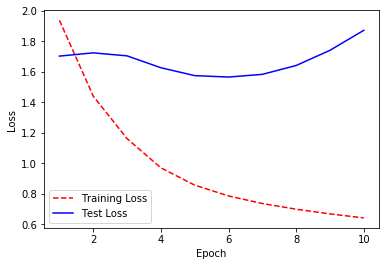

In [31]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

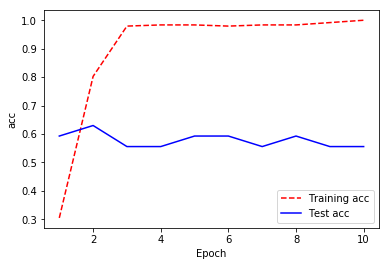

In [32]:
# Get training and test loss histories
training_loss = history.history['acc']
test_loss = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training acc', 'Test acc'])
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show();

In [33]:
predict_table = pd.DataFrame( columns=['text','new_label'],index=['1'])

In [34]:
predict_table['text'][0]="white house correspondents dinner"
print(predict_table)


                                text new_label
1  white house correspondents dinner       NaN


In [35]:
today=tokenizer.texts_to_matrix(predict_table['text'])
print(today.shape)
today=today.reshape(today.shape[0],5000,1)

(1, 5000)


#X=model.predict(today)
#print(model.predict(today))

#predict_table['new-label'][0]=np.argmax(X,axis=1)
#print(predict_table)

In [36]:
x=model.predict(x_test)

In [37]:
from pandas.core.frame import DataFrame

In [38]:
X=DataFrame(x)

In [39]:
print(X)

           0         1         2
0   0.016001  0.112113  0.871886
1   0.648990  0.074623  0.276386
2   0.727640  0.012468  0.259892
3   0.232609  0.680712  0.086678
4   0.000279  0.000488  0.999233
5   0.135253  0.004515  0.860232
6   0.043803  0.005995  0.950202
7   0.242775  0.253818  0.503408
8   0.130059  0.071624  0.798317
9   0.090907  0.527771  0.381322
10  0.272541  0.407310  0.320149
11  0.118958  0.039727  0.841315
12  0.889014  0.090001  0.020984
13  0.062984  0.147039  0.789976
14  0.002481  0.090469  0.907050
15  0.317404  0.254034  0.428563
16  0.015109  0.089360  0.895531
17  0.150908  0.088111  0.760981
18  0.167556  0.325545  0.506899
19  0.350707  0.076810  0.572483
20  0.544460  0.068436  0.387104
21  0.237559  0.452692  0.309749
22  0.363839  0.161032  0.475129
23  0.531799  0.430238  0.037963
24  0.314772  0.483407  0.201821
25  0.428480  0.132094  0.439426
26  0.953941  0.020780  0.025279
27  0.027797  0.000193  0.972009
28  0.081487  0.735938  0.182576
29  0.0132

In [40]:
X['max_value']=X.max(axis=1)
X['max_index']=np.argmax(x,axis=1)

In [41]:
predict_test_y=np.array(X['max_index'])
test_y=np.array(test['label'])

In [42]:
sum(predict_test_y==test_y)

23

In [38]:
#X['predict']=predict_test_y
#X['acc']=test['label']+2

In [43]:
y=DataFrame(columns=['predict','acc'])

In [40]:
##y['predict']=X['predict']
#y['acc']=test['label']+2

In [44]:
final_table = pd.DataFrame({'text':test['text'],'actual':test['label'],'predicted':predict_test_y})

In [45]:
print(final_table)

                                                  text  actual  predicted
138  trump approval rebounds surges among hispanics...       0          2
132  campaigned creating merit based immigration sy...       2          0
208  president trump unemployment rate drop analyst...       1          0
142  today bedminster signed harry w colmery vetera...       1          1
214  vote cut taxes vote put america first time tak...       2          2
216  economists tax cuts jobs act gthe enactment co...       2          2
84   civilized nations must join together protect h...       2          2
101  melania offer deepest condolences family otto ...       2          2
64   presidential executive order promoting agricul...       2          2
99   congressionalbaseballgame thank wisconsin tues...       2          1
5    promise administration always back always cong...       2          1
117  big win today building wall secure border save...       2          2
104  thinking stevescalise teamscalise

[[ 3  0  4]
 [ 3  2  3]
 [ 3  5 18]]
[[0.43 0.   0.57]
 [0.38 0.25 0.38]
 [0.12 0.19 0.69]]


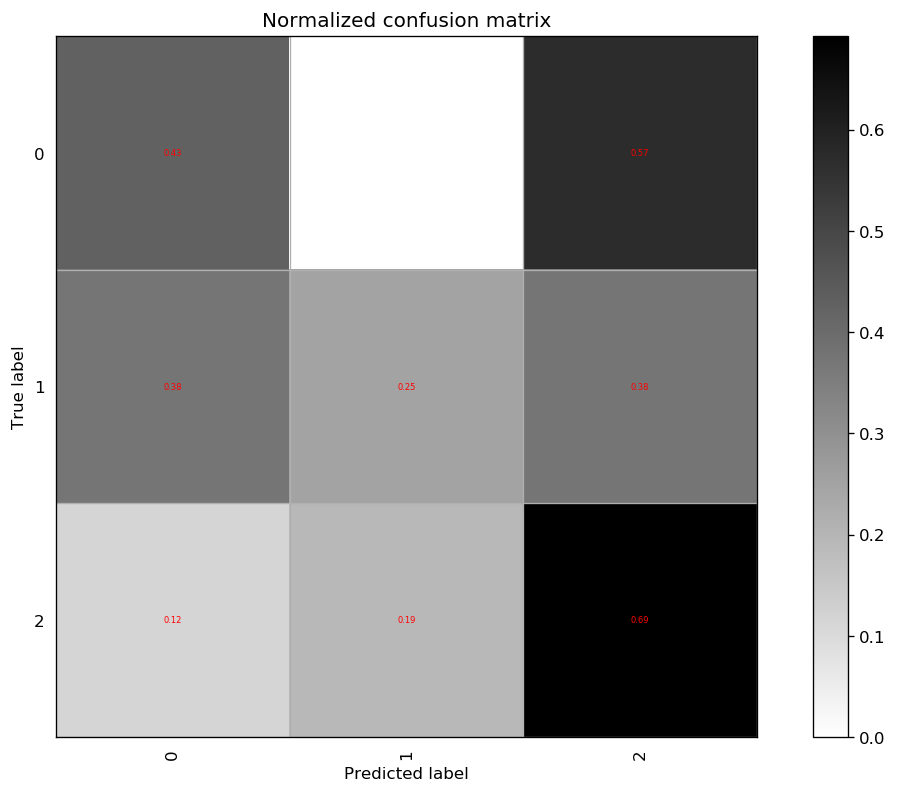

In [46]:
# -*-coding:utf-8-*-
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#labels表示你不同类别的代号，比如这里的demo中有13个类别
labels = ['0', '1', '2']

#y_true代表真实的label值 y_pred代表预测得到的lavel值
y_true = test['label']
y_pred = predict_test_y

tick_marks = np.array(range(len(labels))) + 0.5


def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm= confusion_matrix(y_true, y_pred)
print(cm)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print (cm_normalized)
plt.figure(figsize=(12, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.01:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=5, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
# show confusion matrix
plt.show()

history = model.fit(x_train, # Features
                      train['label'], # Target
                      epochs=20, # Number of epochs
                      verbose=1, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

model=Sequential()
model.add(Dense(50,input_shape=(5000, 1)))
#here the standardize is the function we define upwords
model.add(Dense(50,activation='relu'))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
#only with softmax, it is a linear model

!pip install pydot

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128 
nb_classes = 5
nb_epoch = 20

history = LossHistory()
model.fit(X_train, Y_train,
            batch_size=batch_size, nb_epoch=nb_epoch,
            verbose=1, 
            validation_data=(X_test, Y_test),
            callbacks=[history])

history.loss_plot('epoch')

In [59]:
tweets_2018=pd.read_csv('2018 Tweets.csv', header=None, names=['x','text'])

In [60]:
tweets_2018.head()

,x,text
0,0,despite many positive events victories media r...
1,9,walker stapleton running highly respected repu...
2,11,thank iowa nebraska vote vote vote
3,12,NaN
4,13,beautiful evening iowa god bless u maga


In [61]:
tweets_2018.drop('x', axis=1,inplace=True)

In [62]:
tweets_2018.dropna(inplace=True)

In [63]:
tweets_2018

,text
0,despite many positive events victories media r...
1,walker stapleton running highly respected repu...
2,thank iowa nebraska vote vote vote
4,beautiful evening iowa god bless u maga
5,relentless securing funding fix algae problem ...
6,president donald j trump approves florida emer...
7,register vote
8,florida imperative heed directions state local...
9,looks cat even intense florence good news folk...
10,hurricane way florida pan handle major element...


In [68]:
x_new=tokenizer.texts_to_matrix(tweets_2018['text'])

In [70]:
prediction = model.predict(x_new)
print(prediction)

[[9.83e-01 9.73e-06 1.67e-02]
 [9.98e-01 2.05e-04 1.34e-03]
 [4.94e-02 2.12e-01 7.38e-01]
 [1.85e-01 8.08e-01 7.05e-03]
 [3.98e-02 5.01e-02 9.10e-01]
 [1.88e-01 6.62e-01 1.50e-01]
 [5.56e-01 5.11e-02 3.93e-01]
 [3.33e-02 3.28e-03 9.63e-01]
 [9.10e-01 8.67e-02 3.50e-03]
 [2.05e-01 7.84e-01 1.10e-02]
 [4.69e-03 6.30e-01 3.65e-01]
 [2.21e-02 6.52e-01 3.25e-01]
 [7.01e-01 2.96e-01 3.31e-03]
 [1.00e+00 1.06e-04 6.10e-05]
 [9.94e-01 1.65e-03 4.71e-03]
 [8.73e-01 6.98e-05 1.27e-01]
 [2.02e-04 9.71e-01 2.84e-02]
 [4.73e-02 2.26e-01 7.27e-01]
 [3.08e-03 9.94e-01 3.02e-03]
 [1.43e-02 9.54e-01 3.15e-02]
 [2.96e-03 5.92e-01 4.05e-01]
 [4.29e-01 4.82e-01 8.93e-02]
 [7.50e-02 6.73e-03 9.18e-01]
 [4.15e-01 5.48e-01 3.71e-02]
 [2.21e-01 6.82e-01 9.73e-02]
 [7.28e-01 1.52e-03 2.70e-01]
 [7.82e-01 1.48e-01 6.95e-02]
 [9.61e-01 2.44e-03 3.65e-02]
 [1.00e+00 1.25e-05 6.83e-06]
 [1.00e+00 1.71e-04 1.01e-05]
 [4.22e-02 9.56e-01 1.59e-03]
 [6.01e-03 9.93e-01 6.73e-04]
 [9.34e-01 1.36e-02 5.29e-02]
 [7.80e-01

In [76]:
df_new=DataFrame(prediction)
#df_new['max_value']=df_new.max(axis=1)
#df_new['max_index']=np.argmax(df_new,axis=1)

,0,1,2
0,9.832724e-01,9.731212e-06,0.016718
1,9.984568e-01,2.050940e-04,0.001338
2,4.939763e-02,2.122554e-01,0.738347
3,1.853144e-01,8.076344e-01,0.007051
4,3.975793e-02,5.013753e-02,0.910105
5,1.877826e-01,6.622497e-01,0.149968
6,5.563809e-01,5.109837e-02,0.392521
7,3.326367e-02,3.277806e-03,0.963459
8,9.098092e-01,8.669081e-02,0.003500
9,2.051546e-01,7.838684e-01,0.010977
